In [1]:
import pandas as pd
import nltk 
import re
import string as st
import wordcloud
from spellchecker import SpellChecker

In [2]:
## loading the dataset into a pandas dataframe
data = pd.read_csv('A1_dataset.csv')
pd.set_option('display.max_colwidth',100)
data.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much


In [3]:
'''
A. TOKENIZATION
## importing necessary libraries from nltk
'''

from nltk.tokenize import sent_tokenize,word_tokenize
def tokenize(txt):
    tok = [word for word in word_tokenize(txt)]
    return tok

"Adding a new column (tokenized tweets) to the dataframe"

data["TOKENIZED"] = data["TEXT"].apply(lambda x:tokenize(x))
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]"
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ...."
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,..."
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s..."


In [4]:
def punctuation_removal(txt):
        rem = [c for c in txt if c not in st.punctuation]
        return rem
def ltos(s):
    str1 = " "
    return str1.join(s)
def formsentence(txt):
    str = ""
    for j in range(len(txt)):
        if(txt[j] == " "):
            str += " "
        else:
            str += txt[j]
    return str
def remove_extraspaces(txt):
    return re.sub("\s+"," ",txt)

In [5]:
'''
B. SPELLING CORRECTION
FOR SPELLING CORRECTION, PYSPELLPY BY PETER NORVIG IS USED
1. FIRST TOKENIZE THE SENTENCE
2. REMOVE ALL THE PUNCTUATIONS AND THEN THE EXTRA SPACES
3. PROCESS THE DATA THROUGH THE LIBRARY FUNCTIONALITY, SpellChecker.unknown()
'''
def SpellParent(s):
    spell = SpellChecker()
    ## s is tweet
    ## s = "@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday"
    li = tokenize(s)
    txt = ltos(li)
    l = punctuation_removal(txt)
    text = formsentence(l)
    text = remove_extraspaces(text)
    text = tokenize(text)
    misspelled = spell.unknown(text)
    incorr = []
    corr = []
    for word in misspelled:
        incorr.append(word)
        corr.append(spell.correction(word))

    corrected_sentence = ""
    for i in range(len(text)):
        word = text[i]
        if(word.lower() in incorr):
            print(word.lower())
            for j in range(len(incorr)):
                if(incorr[j] == word.lower() and corr[j] is not None):
                    corrected_sentence += corr[j]
                    corrected_sentence += ' '
        else:
            corrected_sentence += word
            corrected_sentence += ' '
    return corrected_sentence

In [6]:
## MISSPELLED WORDS AS PER PYSPELLCHECKER and column addition
data["SPELL"] = data["TEXT"].apply(lambda x:SpellParent(x))

awaisnaseer
shezan
mangooo
sooooooooooo
lt
gt
marama
afternoon
gfalcone601
gido
nt
worrywe
ll
mrstessyman
knitpicks
getmevideo
rafa
djokovic
ll
dvr
s
minecart
s
tb78
sokendrakouture
realdeal32
yoginifoodie
mileycyrus
ll
pwn
yeeee
btw
mt
flyingbolt
m
http
bitlyaebs3
iranelection
sctunstall
m
digitallearnin
heppell
s
nz
ihauntwizards
nt
pleease
buckhollywood
m
x
soycamo
weï¿½re
liverpooltx
ll
alixsays
m
domkoenig
mykiaisosm
omj
2nd
thouggh
cyberela
ã¼bersuccesful
quot
quot
btw
s
sallythatgirl
l
8am
casb
spencerpratt
http
twitpiccom3l589
brydie
x
moz
akila
marginatasnaily
nt
scarey
xxx
bossmobb
n
goodnite
m
newerdeal
ds
nt
appt
afternoon
s
m
georgetta
lt
rawon
nguling
cikajang
meggles89
bonnaroo
s
quot
quot
http
blipfm4lfcc
guillot
m
nt
rsvp
dr
s
cmrush
niiice
youre
nachojohnny
ilove
teambudd1
karon
ingadurgin
s
m
officialas
ll
kk
lmao
mrskutcher
26th
eastcoastgamblr
s
lydiastack
mitchelmusso
relese
etf
nessie111
f1
s
thegov
xiaomantous
nakulshenoy
quot
twiiter
quot
btw
quot
quot
jeddimki

In [7]:
data

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much
...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"[@, QandQ, My, performances, on, my, CLEP, tests, ., #, qshock]",and My performances on my clip tests shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on demand now it only has 10-13","[ugh, no, ,, rcn, had, all, the, true, blood, episodes, on, demand, now, it, only, has, 10-13]",ugh no run had all the true blood episodes on demand now it only has 1013
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merchy) lost her keys in the woods! what a day!,"[Just, returned, from, the, forest, !, Sarah, (, my, merchy, ), lost, her, keys, in, the, woods,...",Just returned from the forest Sarah my mercy lost her keys in the woods what a day
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( http://www.hakkastudy.in.th/) keep it up papa,"[is, proud, of, her, dad, and, his, piece, of, work, ., (, http, :, //www.hakkastudy.in.th/, ), ...",is proud of her dad and his piece of work help keep it up papa


In [8]:
'''
C. LEMMATIZATION
importing WordNetLemmatizer from NLTK
'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(txt):
    lemm = [lemmatizer.lemmatize(word) for word in word_tokenize(txt)]
    return lemm

data["lemm"] = data["SPELL"].apply(lambda x:lemmatize(x))
lemma = []
for i in range(len(data)):
    lemma.append(' '.join(data["lemm"][i]))
data["LEMM"] = lemma
data

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much
...,...,...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"[@, QandQ, My, performances, on, my, CLEP, tests, ., #, qshock]",and My performances on my clip tests shock,"[and, My, performance, on, my, clip, test, shock]",and My performance on my clip test shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on demand now it only has 10-13","[ugh, no, ,, rcn, had, all, the, true, blood, episodes, on, demand, now, it, only, has, 10-13]",ugh no run had all the true blood episodes on demand now it only has 1013,"[ugh, no, run, had, all, the, true, blood, episode, on, demand, now, it, only, ha, 1013]",ugh no run had all the true blood episode on demand now it only ha 1013
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merchy) lost her keys in the woods! what a day!,"[Just, returned, from, the, forest, !, Sarah, (, my, merchy, ), lost, her, keys, in, the, woods,...",Just returned from the forest Sarah my mercy lost her keys in the woods what a day,"[Just, returned, from, the, forest, Sarah, my, mercy, lost, her, key, in, the, wood, what, a, day]",Just returned from the forest Sarah my mercy lost her key in the wood what a day
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( http://www.hakkastudy.in.th/) keep it up papa,"[is, proud, of, her, dad, and, his, piece, of, work, ., (, http, :, //www.hakkastudy.in.th/, ), ...",is proud of her dad and his piece of work help keep it up papa,"[is, proud, of, her, dad, and, his, piece, of, work, help, keep, it, up, papa]",is proud of her dad and his piece of work help keep it up papa


In [9]:
'''
D. PUNCTUATION REMOVAL
'''
def Punct_removal(txt):
    rem = [c for c in txt if c not in st.punctuation]
    return rem
data["NOPUNCTUATION"] = data["LEMM"].apply(lambda x:Punct_removal(x))
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]"
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,..."
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,..."
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,..."
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,..."


In [11]:
## CONVERT BACK NO PUNCTUATION tokens INTO sentences
## PUNCTUATIONS WERE ALREADY REMOVED IN STEP 2 (SPELL CORRECTION) AS IT WAS A REQUIREMENT
punct_removed = []
for i in range(len(data)):
    str = ""
    txt = data["NOPUNCTUATION"].iloc[i]
    for j in range(len(txt)):
        if(txt[j] == " "):
            str += " "
        else:
            str += txt[j]
    punct_removed.append(str)
data["PUNCT_REMOVED"] = punct_removed
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much


In [12]:
data.drop("NOPUNCTUATION",axis=1)

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,PUNCT_REMOVED
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,I like sean mango too I had one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,mama Actually we start this I will try to have something by Wed It will be a slow process of col...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,Aww lido it worry all vote for you nonstop coz we love you so much
...,...,...,...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"[@, QandQ, My, performances, on, my, CLEP, tests, ., #, qshock]",and My performances on my clip tests shock,"[and, My, performance, on, my, clip, test, shock]",and My performance on my clip test shock,and My performance on my clip test shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on demand now it only has 10-13","[ugh, no, ,, rcn, had, all, the, true, blood, episodes, on, demand, now, it, only, has, 10-13]",ugh no run had all the true blood episodes on demand now it only has 1013,"[ugh, no, run, had, all, the, true, blood, episode, on, demand, now, it, only, ha, 1013]",ugh no run had all the true blood episode on demand now it only ha 1013,ugh no run had all the true blood episode on demand now it only ha 1013
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merchy) lost her keys in the woods! what a day!,"[Just, returned, from, the, forest, !, Sarah, (, my, merchy, ), lost, her, keys, in, the, woods,...",Just returned from the forest Sarah my mercy lost her keys in the woods what a day,"[Just, returned, from, the, forest, Sarah, my, mercy, lost, her, key, in, the, wood, what, a, day]",Just returned from the forest Sarah my mercy lost her key in the wood what a day,Just returned from the forest Sarah my mercy lost her key in the wood what a day
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( http://www.hakkastudy.in.th/) keep it up papa,"[is, proud

In [13]:
## USING REGEX REMOVE STOPWORDS
## CURRENTLY REMOVING STOPWORDS THROUGH NLTK
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def stopword_removal(txt):
    stpwrds = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b') 
    txt = stpwrds.sub('', txt)
    li = list(txt.split(" "))
    return li
    #\s*

data["REM_STOP"] = data["PUNCT_REMOVED"].apply(lambda x:stopword_removal(x))
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,REM_STOP
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,"[About, , get, threaded, , scared]"
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,"[I, like, sean, mango, , I, , one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, , , car, , work, showering, , going, , bed, tired, sparrow, signing, , , Cowboy, Up, ]"
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, , start, , I, , try, , , something, , Wed, It, , , , slow, process, , collectin..."
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, , worry, , vote, , , nonstop, coz, , love, , , much]"


In [14]:
nostop = []
for i in range(len(data)):
    nostop.append(' '.join(data["REM_STOP"][i]))
data["NOSTOP"] = nostop
data.drop(['REM_STOP'],axis=1)
## data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,NOSTOP
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,About get threaded scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,I like sean mango I one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,worked car work showering going bed tired sparrow signing Cowboy Up
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,mama Actually start I try something Wed It slow process collecting many vac
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,Aww lido worry vote nonstop coz love much
...,...,...,...,...,...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"[@, QandQ, My, performances, on, my, CLEP, tests, ., #, qshock]",and My performances on my clip tests shock,"[and, My, performance, on, my, clip, test, shock]",and My performance on my clip test shock,"[a, n, d, , M, y, , p, e, r, f, o, r, m, a, n, c, e, , o, n, , m, y, , c, l, i, p, , t, e,...",and My performance on my clip test shock,My performance clip test shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on demand now it only has 10-13","[ugh, no, ,, rcn, had, all, the, true, blood, episodes, on, demand, now, it, only, has, 10-13]",ugh no run had all the true blood episodes on demand now it only has 1013,"[ugh, no, run, had, all, the, true, blood, episode, on, dema

In [15]:
## USING REGEX REMOVE EXTRA WHITESPACES
def remove_extraspaces(txt):
    return re.sub("\s+"," ",txt)
data["NOSPACE"] = data["NOSTOP"].apply(lambda x:remove_extraspaces(x))
data

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,REM_STOP,NOSTOP,NOSPACE
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,"[About, , get, threaded, , scared]",About get threaded scared,About get threaded scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,"[I, like, sean, mango, , I, , one, yesterday]",I like sean mango I one yesterday,I like sean mango I one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, , , car, , work, showering, , going, , bed, tired, sparrow, signing, , , Cowboy, Up, ]",worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, , start, , I, , try, , , something, , Wed, It, , , , slow, process, , collectin...",mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, , worry, , vote, , , nonstop, coz, , love, , , much]",Aww lido worry vote nonstop coz love much,Aww lido worry vote nonstop coz love much
...,...,...,...,...,...,...,...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"[@, QandQ, My, performances, on, my, CLEP, tests, ., #, qshock]",and My performances on 

In [16]:
## Using regex remove URL and HTML tag
def removeURL_TAG(txt):
    url_less = re.sub(r'http[^\s]+|[a-zA-z0-9_\-\.]+\.com[a-zA-z0-9_\-\.~:/\?#\[\]@!\$&\'\*\+,;=]*','',txt)
    url_html_less = re.sub(r'<.+>','',url_less)
    return url_html_less
data["^URL_HTML"] = data["NOSTOP"].apply(lambda x:removeURL_TAG(x))
data

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,REM_STOP,NOSTOP,NOSPACE,^URL_HTML
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,"[About, , get, threaded, , scared]",About get threaded scared,About get threaded scared,About get threaded scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,"[I, like, sean, mango, , I, , one, yesterday]",I like sean mango I one yesterday,I like sean mango I one yesterday,I like sean mango I one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, , , car, , work, showering, , going, , bed, tired, sparrow, signing, , , Cowboy, Up, ]",worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, , start, , I, , try, , , something, , Wed, It, , , , slow, process, , collectin...",mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, , worry, , vote, , , nonstop, coz, , love, , , much]",Aww lido worry vote nonstop coz love much,Aww lido worry vote nonstop coz love much,Aww lido

In [19]:
'''
SECTION 2 LAST PART
Choose one sentence from each class (positive and negative) and show its output after each
preprocessing step (a-g).
'''

## POSITIVE CLASS SAMPLE AFTER PREPROCESSING
print("POSITIVE CLASS SAMPLE AFTER PREPROCESSING")
print("RAW TEXT: ",data["TEXT"].iloc[1])
print("TOKENIZED SENTENCE: " , data['TOKENIZED'].iloc[1])
print("PUNCTUATIONS REMOVAL: ", ltos(punctuation_removal(data['TOKENIZED'].iloc[1])))
print("SPACES REMOVAL: ",remove_extraspaces(ltos(punctuation_removal(data['TOKENIZED'].iloc[1]))))
print("SPELLING CORRECTION: ",data["SPELL"].iloc[1])
print("LEMMATIZATION: ",data["LEMM"].iloc[1])
print("STOPWORDS REMOVAL: ",data["NOSTOP"].iloc[1])
print("HTML AND URL REMOVAL: ",remove_extraspaces(data["^URL_HTML"].iloc[1]))


print("---------------------------------------------------------------------------------")

## NEGATIVE CLASS SAMPLE AFTER PREPROCESSING
print("NEGATIVE CLASS SAMPLE AFTER PREPROCESSING")
print("RAW TEXT: ",data["TEXT"].iloc[2465])
print("TOKENIZED SENTENCE: " , data['TOKENIZED'].iloc[2465])
print("PUNCTUATIONS REMOVAL: ", ltos(punctuation_removal(data['TOKENIZED'].iloc[2465])))
print("SPACES REMOVAL: ",remove_extraspaces(ltos(punctuation_removal(data['TOKENIZED'].iloc[2465]))))
print("SPELLING CORRECTION: ",data["SPELL"].iloc[2465])
print("LEMMATIZATION: ",data["LEMM"].iloc[2465])
print("STOPWORDS REMOVAL: ",data["NOSTOP"].iloc[2465])
print("HTML AND URL REMOVAL: ",remove_extraspaces(data["^URL_HTML"].iloc[2465]))

POSITIVE CLASS SAMPLE AFTER PREPROCESSING
RAW TEXT:  @awaisnaseer I like Shezan Mangooo too!!! I had one yesterday 
TOKENIZED SENTENCE:  ['@', 'awaisnaseer', 'I', 'like', 'Shezan', 'Mangooo', 'too', '!', '!', '!', 'I', 'had', 'one', 'yesterday']
PUNCTUATIONS REMOVAL:  awaisnaseer I like Shezan Mangooo too I had one yesterday
SPACES REMOVAL:  awaisnaseer I like Shezan Mangooo too I had one yesterday
SPELLING CORRECTION:  I like sean mango too I had one yesterday 
LEMMATIZATION:  I like sean mango too I had one yesterday
STOPWORDS REMOVAL:  I like sean mango  I  one yesterday
HTML AND URL REMOVAL:  I like sean mango I one yesterday
---------------------------------------------------------------------------------
NEGATIVE CLASS SAMPLE AFTER PREPROCESSING
RAW TEXT:  Mystery slide. check. Methodology. check. X-ray report. che- oh wait, damn it!  *shakes fists at X-rays* what a horrible Friday night.
TOKENIZED SENTENCE:  ['Mystery', 'slide', '.', 'check', '.', 'Methodology', '.', 'check', '.

In [20]:
## SECTION III
## VISUALIZATION OF WORD CLOUDS OF BOTH CLASSES

from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_text = ''
neg_text = ''
for i in range(len(data['^URL_HTML'])):
    cmnt = data['^URL_HTML'].iloc[i]
    tokenized = cmnt.split()
    text = ''
    for j in range(len(tokenized)):
        tokenized[j] = tokenized[j].lower()
    text += " ".join(tokenized)+" "
    if(data['LABEL'].iloc[i] == 0):
        neg_text += text
    else:
        pos_text += text

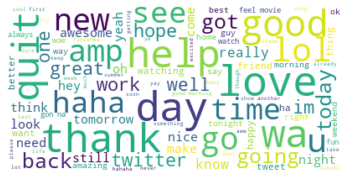

In [21]:
## WORDCLOUD FOR POSITIVE TWEETS
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

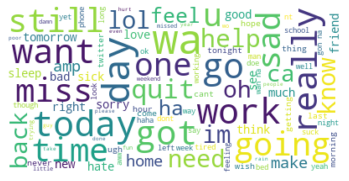

In [22]:
## WORDCLOUD FOR NEGATIVE TWEETS
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neg_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

'''
OBSERVATIONS:
1. for the positive tweets,the most frequently occuring words in the preprocessed text include
   "love","good","new","lol","thank","hope","great" all which are commonly used in positive tweets
2. for the negative tweets,the most frequently occuring words in the preprocessed text include
   "sad","miss","sorry","quit" which are used often in negative tweets. Words such as "really" and "still" also 
   find context in not so positively stated sentences and hence are prominent in negative wordcloud.
3. there are a few outliers as well such as "quit" but context of the sentence changes as they are used
   For example: "I wont quit ever" and "I am such a loser,I quit" have two completely different meaning
   but both use the word "quit".
'''

In [23]:
## SECTION IV
## VADER SENTIMENT ANALYSIS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [24]:
def sentimentAnalyze(txt):
    obj = SentimentIntensityAnalyzer()
    sentiment_dict = obj.polarity_scores(txt)
    neu_score = sentiment_dict['neu']
    pos_score = sentiment_dict['pos']
    neg_score = sentiment_dict['neg']
    comp = sentiment_dict['compound']
    if(comp>=0):
        return 1
    else:
        return 0

In [25]:
pred = []
for i in range(len(data)):
    txt = data["^URL_HTML"].iloc[i]
    pred.append(sentimentAnalyze(txt))
data['senti_pred_preprocessed'] = pred
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,REM_STOP,NOSTOP,NOSPACE,^URL_HTML,senti_pred_preprocessed
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,"[About, , get, threaded, , scared]",About get threaded scared,About get threaded scared,About get threaded scared,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,"[I, like, sean, mango, , I, , one, yesterday]",I like sean mango I one yesterday,I like sean mango I one yesterday,I like sean mango I one yesterday,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, , , car, , work, showering, , going, , bed, tired, sparrow, signing, , , Cowboy, Up, ]",worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, , start, , I, , try, , , something, , Wed, It, , , , slow, process, , collectin...",mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac,1
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, , worry, , vote, , , nonstop, coz, , love, , , much]",Aww lido worry vote nonstop coz love much,Aww lido worry vot

In [26]:
pred_orig = []
for i in range(len(data)):
    txt = data["TEXT"].iloc[i]
    pred_orig.append(sentimentAnalyze(txt))
data['senti_pred'] = pred_orig
data.head()

,LABEL,DATE_TIME,TEXT,TOKENIZED,SPELL,lemm,LEMM,NOPUNCTUATION,PUNCT_REMOVED,REM_STOP,NOSTOP,NOSPACE,^URL_HTML,senti_pred_preprocessed,senti_pred
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[About, to, get, threaded, and, scared]",About to get threaded and scared,"[A, b, o, u, t, , t, o, , g, e, t, , t, h, r, e, a, d, e, d, , a, n, d, , s, c, a, r, e, d]",About to get threaded and scared,"[About, , get, threaded, , scared]",About get threaded scared,About get threaded scared,About get threaded scared,0,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday,"[@, awaisnaseer, I, like, Shezan, Mangooo, too, !, !, !, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, like, sean, mango, too, I, had, one, yesterday]",I like sean mango too I had one yesterday,"[I, , l, i, k, e, , s, e, a, n, , m, a, n, g, o, , t, o, o, , I, , h, a, d, , o, n, e, ,...",I like sean mango too I had one yesterday,"[I, like, sean, mango, , I, , one, yesterday]",I like sean mango I one yesterday,I like sean mango I one yesterday,I like sean mango I one yesterday,1,1
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing ou...,"[worked, on, my, car, after, work, ., showering, then, going, to, bed, ., sooooooooooo, tired, ....",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, on, my, car, after, work, showering, then, going, to, bed, tired, sparrow, signing, out...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[w, o, r, k, e, d, , o, n, , m, y, , c, a, r, , a, f, t, e, r, , w, o, r, k, , s, h, o, w,...",worked on my car after work showering then going to bed tired sparrow signing out it Cowboy Up it,"[worked, , , car, , work, showering, , going, , bed, tired, sparrow, signing, , , Cowboy, Up, ]",worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up,worked car work showering going bed tired sparrow signing Cowboy Up,0,0
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I will try to have something by Wed. It will be a slo...,"[@, Marama, Actually, we, start, this, afternoon, !, I, will, try, to, have, something, by, Wed,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, we, start, this, I, will, try, to, have, something, by, Wed, It, will, be, a, s...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[m, a, m, a, , A, c, t, u, a, l, l, y, , w, e, , s, t, a, r, t, , t, h, i, s, , I, , w, i,...",mama Actually we start this I will try to have something by Wed It will be a slow process of col...,"[mama, Actually, , start, , I, , try, , , something, , Wed, It, , , , slow, process, , collectin...",mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac,mama Actually start I try something Wed It slow process collecting many vac,1,1
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much,"[@, gfalcone601, Aww, Gi.do, n't, worry.we, 'll, vote, for, you, non-stop, coz, we, love, you, s...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, it, worry, all, vote, for, you, nonstop, coz, we, love, you, so, much]",Aww lido it worry all vote for you nonstop coz we love you so much,"[A, w, w, , l, i, d, o, , i, t, , w, o, r, r, y, , a, l, l, , v, o, t, e, , f, o, r, , y,...",Aww lido it worry all vote for you nonstop coz we love you so much,"[Aww, lido, , worry, , vote, , , nonstop, coz, , love, , , much]",Aww lido worry vote nonstop coz love much

In [27]:
def accuracy_original():
    match = 0
    for i in range(len(data)):
        if(data['senti_pred'].iloc[i] == data['LABEL'].iloc[i]):
            match = match + 1
    return match/len(data)
raw_accuracy = accuracy_original()
print(raw_accuracy)

0.6862607884301376


In [28]:
def accuracy_preprocessed():
    match = 0
    for i in range(len(data)):
        if(data['senti_pred_preprocessed'].iloc[i] == data['LABEL'].iloc[i]):
            match = match + 1
    return match/len(data)
preprocessed_accuracy = accuracy_preprocessed()
print(preprocessed_accuracy)

0.6657336132493585


In [ ]:
data

In [ ]:
## comp = -0.1  , raw = 67.92 and preprocessed = 66.08
## comp = -0.08 , raw = 67.99 and preprocessed = 66.10
## comp = -0.05 , raw = 68.46 and preprocessed = 66.52
## comp = -0.03 , raw = 68.48 and preprocessed = 66.48
## comp = -0.025, raw = 68.53 and preprocessed = 66.57
## comp = -0.01, raw = 68.60 and preprocessed = 66.57
## comp = -0.005,raw = 68.62 and preprocessed = 66.57
## comp = 0,raw = 68.62 and preprocessed = 66.57
## comp = 0.05, raw = 65.75 and preprocessed = 65.71